It's amazing the things we can do with data today. With the power of machine learning & deep learning , the industry is booming in all fields 

* In IT Fields
* Medical
* Machine Industries
and many more!

In this kernel , we are given the features and we will classify if the person has a heart disesase or not , before we dive into it we will performing exploratory data analysis and understand the feature's with respect to the target variable ('target' being the target variable).

<h2>Importing the required library's</h2>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.feature_selection import chi2
import plotly.figure_factory as ff
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-uci/heart.csv


<h2>Data Analysis</h2>

In [2]:
df = pd.read_csv("/kaggle/input/heart-disease-uci/heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

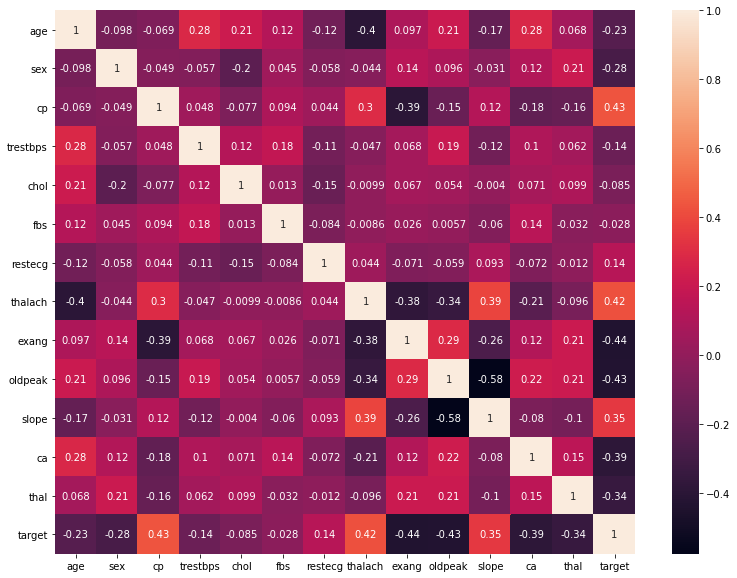

In [6]:
fig_dims = (13, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(df.corr(),annot=True , ax=ax)

In [7]:
male = df.loc[df['sex']==0]
female = df.loc[df['sex']==1]

Text(0.5, 1.0, 'Cholestrol levels (Red - Male with target = 1 , Yellow - Male with target = 0\n          \nBlue - Female with target = 1 , Yellow - Female with target = 0 ')

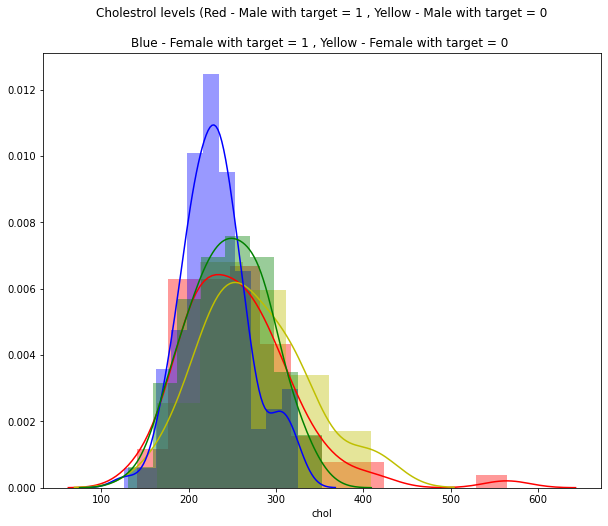

In [81]:
plt.figure(figsize=(10,8))
sns.distplot(male['chol'].loc[male['target']==1],color='r')
sns.distplot(male['chol'].loc[male['target']==0],color='y')
sns.distplot(female['chol'].loc[female['target']==1],color='b')
sns.distplot(female['chol'].loc[female['target']==0],color='g')
plt.title("""Cholestrol levels (Red - Male with target = 1 , Yellow - Male with target = 0
          \nBlue - Female with target = 1 , Yellow - Female with target = 0 """)

Text(0.5, 1.0, 'Resting blood pressure(Red - Male with target 1 Yellow - Male with target - 0\n\n        Blue - Female with target - 1 Green - Female with target - 0)')

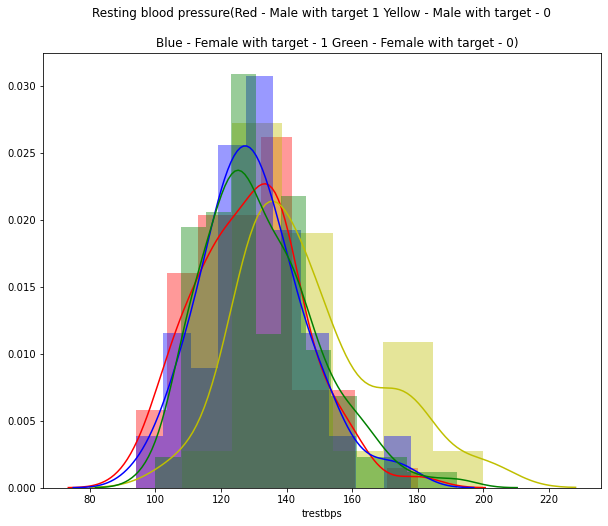

In [84]:
plt.figure(figsize=(10,8))
sns.distplot(male['trestbps'].loc[male['target']==1],color='r')
sns.distplot(male['trestbps'].loc[male['target']==0],color='y')
sns.distplot(female['trestbps'].loc[female['target']==1],color='b')
sns.distplot(female['trestbps'].loc[female['target']==0],color='g')
plt.title("""Resting blood pressure(Red - Male with target 1 Yellow - Male with target - 0\n
        Blue - Female with target - 1 Green - Female with target - 0)""")

Text(0.5, 1.0, 'Maximum heart rate(Red - Male with target 1 Yellow - Male with target - 0\n\n        Blue - Female with target - 1 Green - Female with target - 0)')

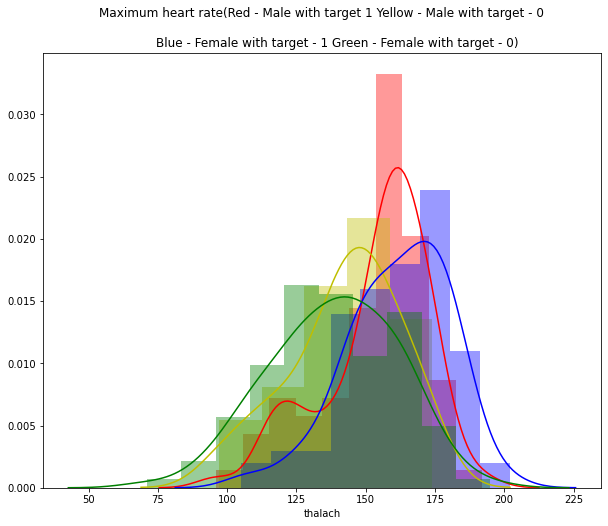

In [87]:
plt.figure(figsize=(10,8))
sns.distplot(male['thalach'].loc[male['target']==1],color='r')
sns.distplot(male['thalach'].loc[male['target']==0],color='y')
sns.distplot(female['thalach'].loc[female['target']==1],color='b')
sns.distplot(female['thalach'].loc[female['target']==0],color='g')
plt.title("""Maximum heart rate(Red - Male with target 1 Yellow - Male with target - 0\n
        Blue - Female with target - 1 Green - Female with target - 0)""")

Text(0.5, 1.0, 'Age distribution (Red - Male with target 1 Yellow - Male with target - 0\n\n        Blue - Female with target - 1 Green - Female with target - 0)')

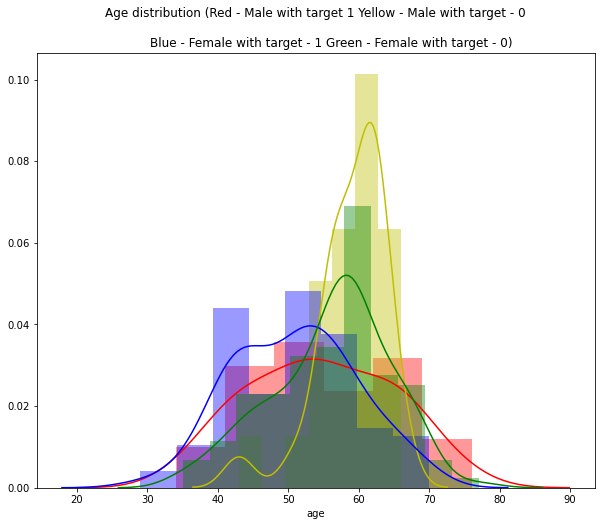

In [88]:
plt.figure(figsize=(10,8))
sns.distplot(male['age'].loc[male['target']==1],color='r')
sns.distplot(male['age'].loc[male['target']==0],color='y')
sns.distplot(female['age'].loc[female['target']==1],color='b')
sns.distplot(female['age'].loc[female['target']==0],color='g')
plt.title("""Age distribution (Red - Male with target 1 Yellow - Male with target - 0\n
        Blue - Female with target - 1 Green - Female with target - 0)""")

Text(0.5, 1.0, 'Old peak distribution (Red - Male with target 1 Yellow - Male with target - 0\n\n        Blue - Female with target - 1 Green - Female with target - 0)')

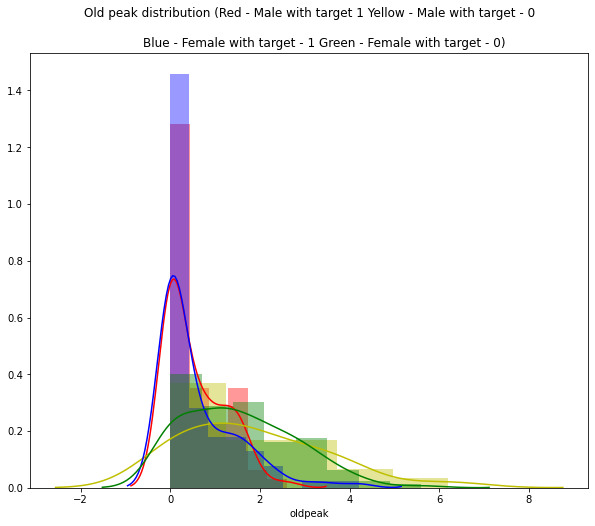

In [89]:
plt.figure(figsize=(10,8))
sns.distplot(male['oldpeak'].loc[male['target']==1],color='r')
sns.distplot(male['oldpeak'].loc[male['target']==0],color='y')
sns.distplot(female['oldpeak'].loc[female['target']==1],color='b')
sns.distplot(female['oldpeak'].loc[female['target']==0],color='g')
plt.title("""Old peak distribution (Red - Male with target 1 Yellow - Male with target - 0\n
        Blue - Female with target - 1 Green - Female with target - 0)""")

Text(0.5, 1.0, 'Old peak')

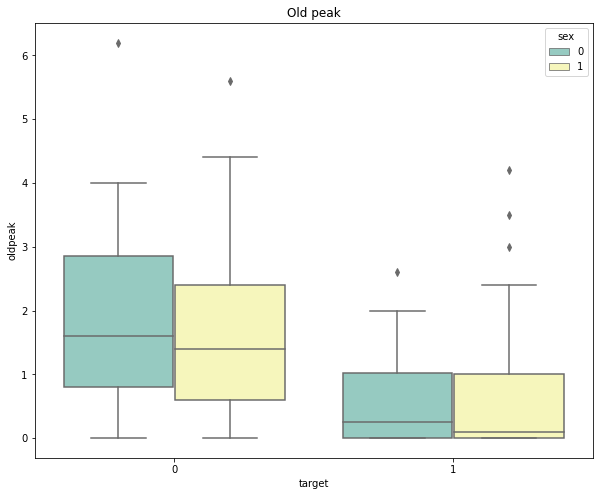

In [13]:
plt.figure(figsize=(10,8))
sns.boxplot(x='target',y='oldpeak',hue='sex',data=df,
           palette='Set3')
plt.title("Old peak")

Text(0.5, 1.0, 'Maximum heart rate recorded')

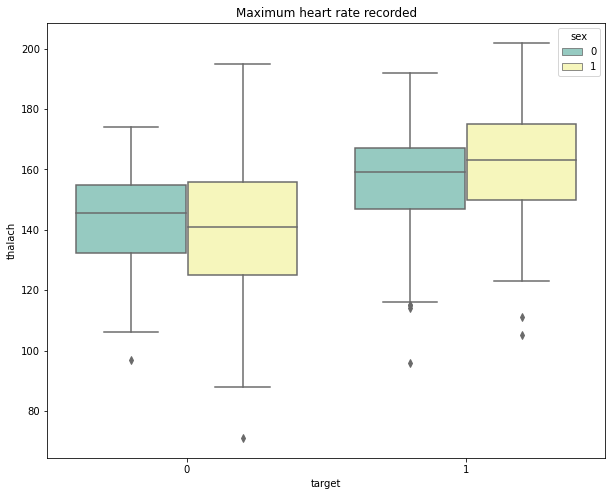

In [91]:
plt.figure(figsize=(10,8))
sns.boxplot(x='target',y='thalach',hue='sex',data=df,
           palette='Set3')
plt.title("Maximum heart rate recorded")

Text(0.5, 1.0, 'Cholestrol level')

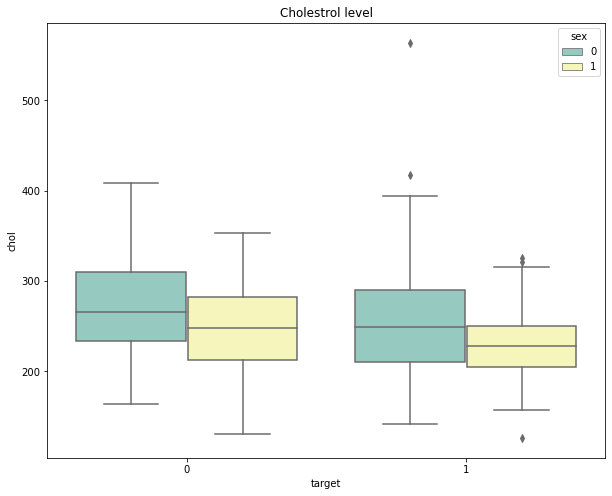

In [15]:
plt.figure(figsize=(10,8))
sns.boxplot(x='target',y=df['chol'],hue='sex',data=df,
           palette='Set3')
plt.title("Cholestrol level")

Text(0.5, 1.0, 'Chest pain and Chol level')

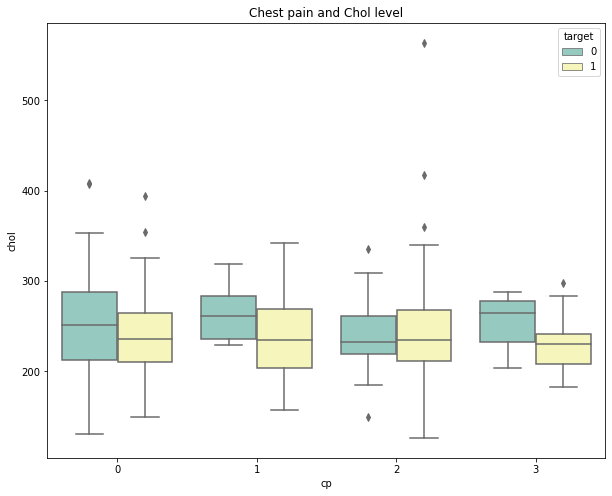

In [16]:
plt.figure(figsize=(10,8))
sns.boxplot(x='cp',y='chol',hue='target',data=df,
           palette='Set3')
plt.title("Chest pain and Chol level")

Text(0.5, 1.0, 'Chest pain and Maximum heart rate recorded')

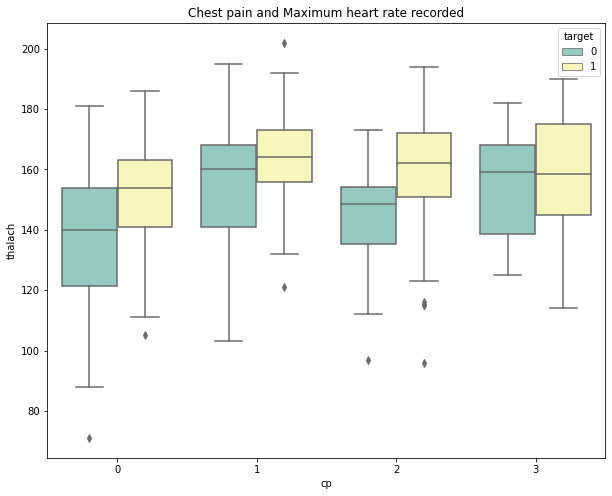

In [92]:
plt.figure(figsize=(10,8))
sns.boxplot(x='cp',
            y='thalach',
            hue='target',
            data=df,
           palette='Set3')
plt.title("Chest pain and Maximum heart rate recorded")

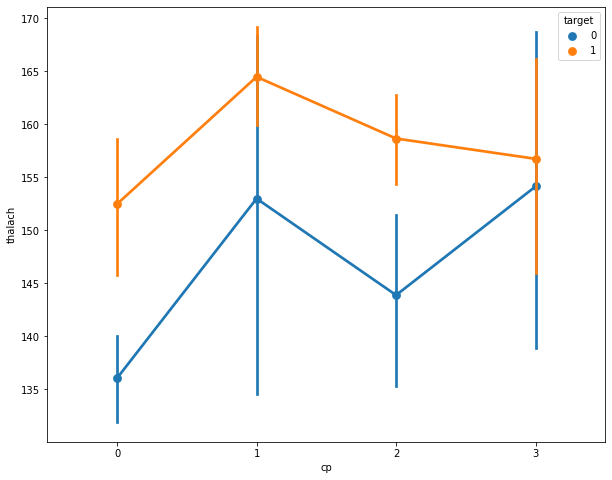

In [18]:
plt.figure(figsize=(10,8))
sns.pointplot(x='cp',y='thalach',hue='target',data=df)

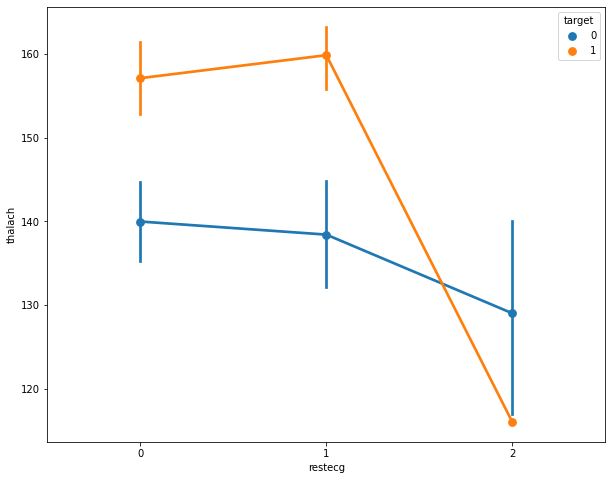

In [19]:
plt.figure(figsize=(10,8))
sns.pointplot(x='restecg',y='thalach',hue='target',data=df)

<h1>Building the Model</h1>

No we will proceed to building the model , I will be using
* Random Forest 
* Decision Tree
* Logistic Regression
* XGBoost

And will also be tuning the Random Forest model with RandomizedSearch and see if any improvement's are seen compared to the model that didn't undergo any hyperparameter tuning.

We will also be scaling the data for a few models to see if it helps improving the score


<h3>Importing the library's</h3>

In [72]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [21]:
feature = df.drop(['target'],axis=1) 
target =  df['target']

In [22]:
x_train , x_test , y_train ,y_test = train_test_split(feature,target,test_size=0.2,random_state=42)

In [25]:
print (f"""X_train :{x_train.shape}
X_TEST : {x_test.shape}
Y_TRAIN : {y_train.shape}
Y_TEST : {y_test.shape}""")

X_train :(242, 13)
X_TEST : (61, 13)
Y_TRAIN : (242,)
Y_TEST : (61,)


In [26]:
lr = LogisticRegression()

In [27]:
lr.fit(x_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

<h3>Classification Report Logistic Regression</h3>

In [28]:
print (classification_report(y_test,lr.predict(x_test)))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [30]:
scaler = MinMaxScaler(feature_range = (0,1))

In [31]:
scaled_train = scaler.fit_transform(x_train)

<h3>Logistic Regression with Scaling</h3>

In [33]:
lr.fit(scaled_train,y_train)

LogisticRegression()

<h3>Classification Report Logistic Regression (w Scaling)

In [34]:
print(classification_report(y_test,lr.predict(scaler.fit_transform(x_test))))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



<h3>Random Forest Classifier</h3>

In [35]:
rf = RandomForestClassifier()

In [26]:
rf.fit(x_train,y_train)

RandomForestClassifier()

<h3>Classification Report Random Forest</h3>

In [27]:
print (classification_report(y_test,rf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



<h3>Random Forest with Scaling</h3>

In [39]:
rf = RandomForestClassifier(criterion='entropy')
rf.fit(scaled_train,y_train)

RandomForestClassifier(criterion='entropy')

<h3>Classsification report for Random Forest (w Scaling)

Even though it's not really a necessity to scale the values before fitting the data into Random Forest , it wouldn't hurt to try it out! :)

In [40]:
print(classification_report(y_test,rf.predict(scaler.fit_transform(x_test))))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82        29
           1       0.82      0.88      0.85        32

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



<h2>Hyperparameter Tuning</h2>

<h3>Random Forest</h3>

In [60]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
criteria = ['entropy','gini']

In [61]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
                'criterion':criteria}

In [63]:
rscv = RandomizedSearchCV(estimator = rfc,param_distributions=random_grid, n_iter = 100 , cv=3 , verbose = 2 , random_state = 42,
                         n_jobs=-1)

In [64]:
rscv.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   30.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.3min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [65]:
rscv.best_params_

{'n_estimators': 1600,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 70,
 'criterion': 'entropy',
 'bootstrap': True}

In [66]:
print(classification_report(y_test,rscv.predict(x_test)))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



<h3>XGBoost Classifier</h3>

In [66]:
from sklearn.ensemble import GradientBoostingClassifier

In [67]:
gbc  = GradientBoostingClassifier()

In [68]:
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [71]:
print (classification_report(y_test,gbc.predict(x_test)))

              precision    recall  f1-score   support

           0       0.74      0.79      0.77        29
           1       0.80      0.75      0.77        32

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



<h3>Decision Tree Classifier</h3>

In [76]:
dc = DecisionTreeClassifier(criterion='entropy')

In [77]:
dc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [78]:
print (classification_report(y_test,dc.predict(x_test)))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        29
           1       0.89      0.78      0.83        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



<h3>Random forest has almost the same score as logistic regression , but logistic regression seems to outperform it</h3>

If you like this kernel , give it an upvote! :)